In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import escodrinyar as sc
import seaborn.objects as so

In [58]:
# print available themes
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [59]:
import matplotlib.pyplot as plt

# set to default
plt.style.use('default')
theme = "seaborn-v0_8-paper"
# theme = "ggplot"
plt.style.use(theme)

import matplotlib as mpl
so.Plot.config.theme.update(mpl.rcParams)

In [60]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

In [61]:
points = (
    sc.Plot(data=penguins, x='bill_length_mm', y='bill_depth_mm', color='species')
    .add(so.Dot(marker='.', alpha=0.1))
)

centroids = (
    sc.Plot(data=penguins, x='bill_length_mm', y='bill_depth_mm', color='species')
    .add(so.Dot(alpha=1e-8))  # keep axis limits
    .add(so.Dot(), sc.Agg2d())
)
chull = (
    sc.Plot(data=penguins, x='bill_length_mm', y='bill_depth_mm', color='species')
    .add(sc.ConvexHull(edgewidth=1))
)

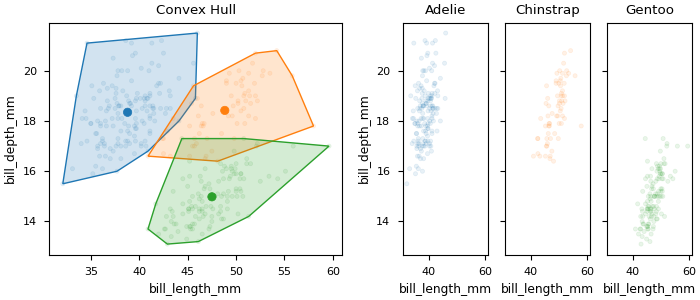

In [62]:
(
    (points * chull * centroids).label(title="Convex Hull") + points.facet('species')
).opts(figsize=(7, 3))

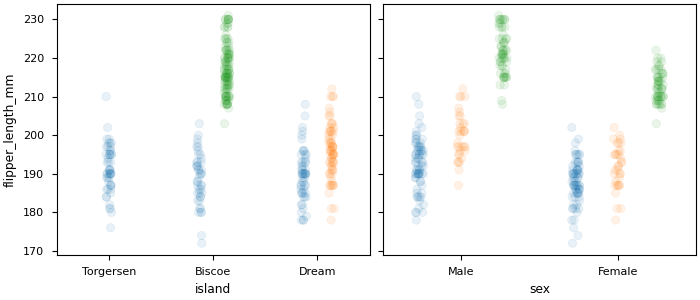

In [63]:
(
    sc.Layout([[
        sc.Plot(data=penguins, y='flipper_length_mm', color='species')
    .add(so.Dot(alpha=0.1), so.Dodge(empty="drop", by=['color']), so.Jitter())
    .pair(x=['island', 'sex'])
        ]])
).opts(figsize=(7, 3))